In [1]:
using DynamicalSystems
using PyPlot
using NLsolve

In [2]:
function r3bpproblem(u,p,t)
    mu = p[1]
    du1 = u[3]+u[2]
    du2 = u[4]-u[1]
    du3=u[4]-(1-mu)*(u[1]+mu)/((u[1]+mu)^2+u[2]^2)^(3/2)-mu*(u[1]+mu-1)/((u[1]+mu-1)^2+u[2]^2)^(3/2)
    du4=-u[3]-(1-mu)*u[2]/((u[1]+mu)^2+u[2]^2)^(3/2)-mu*u[2]/((u[1]+mu-1)^2+u[2]^2)^(3/2)
    return SVector{4}(du1, du2, du3, du4)
end

r3bpproblem (generic function with 1 method)

In [3]:
p=[0.01]
u0 = [0.5-p[1], sqrt(3)/2, -sqrt(3)/2, 0.5-p[1]]
r3bp = ContinuousDynamicalSystem(r3bpproblem,u0,p)

4-dimensional continuous dynamical system
 state:       [0.49, 0.866025, -0.866025, 0.49]
 rule f:      r3bpproblem
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.01]

In [12]:
E=-3/2+1/2*p[1]-1/2*p[1]^2-0.01

-1.5050500000000002

In [13]:
function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [14]:
K=10
x=[(0.5-p[1])+i/200 for i in -K:K]
#3^{-1/3} =.693361274=がL点

21-element Vector{Float64}:
 0.44
 0.445
 0.45
 0.45499999999999996
 0.45999999999999996
 0.46499999999999997
 0.47
 0.475
 0.48
 0.485
 0.49
 0.495
 0.5
 0.505
 0.51
 0.515
 0.52
 0.525
 0.53
 0.535
 0.54

In [15]:
f(P, X)=(sqrt(3)/2)^2/2+1/2*P^2-(sqrt(3)/2)^2-X*P-(1-p[1])/((X+p[1])^2+(sqrt(3)/2)^2)^(1/2)-p[1]/((X+p[1]-1)^2+(sqrt(3)/2)^2)^(1/2)-E

f (generic function with 1 method)

In [19]:
py=zeros(Float64, K)
for i in 1:K
    S=nls(f, x[i],ini=0.5+p[1])
    py[i]=S[1]
end

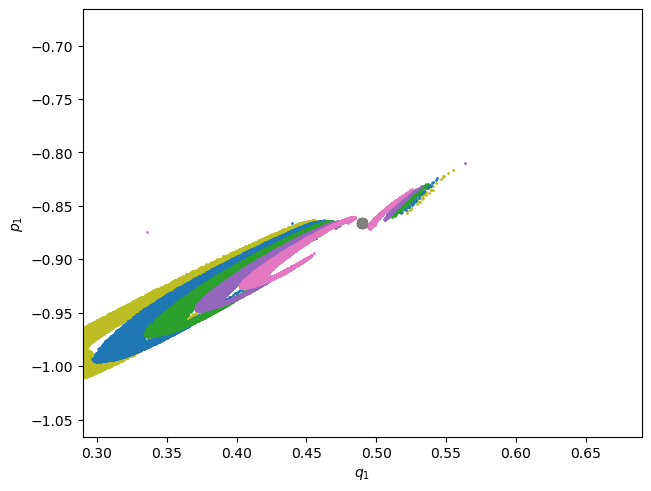

In [23]:
plane = (2, sqrt(3)/2)
d=.2
fig = figure()
xlim(0.5-p[1]-d, 0.5-p[1]+d)
ylim(-sqrt(3)/2-d, -sqrt(3)/2+d)

ps=[]
for i in 1:K-1
    u0=[x[i],sqrt(3)/2,-sqrt(3)/2,py[i]]
    psos = poincaresos(r3bp, plane, 1000000.0; u0 = u0)
    scatter(psos[:, 1], psos[:, 3], s = 1.0)
    scatter(0.5-p[1], -sqrt(3)/2, s = 50.0)
end
xlabel("\$q_1\$"); ylabel("\$p_1\$")
fig.tight_layout(pad=0.3);